<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

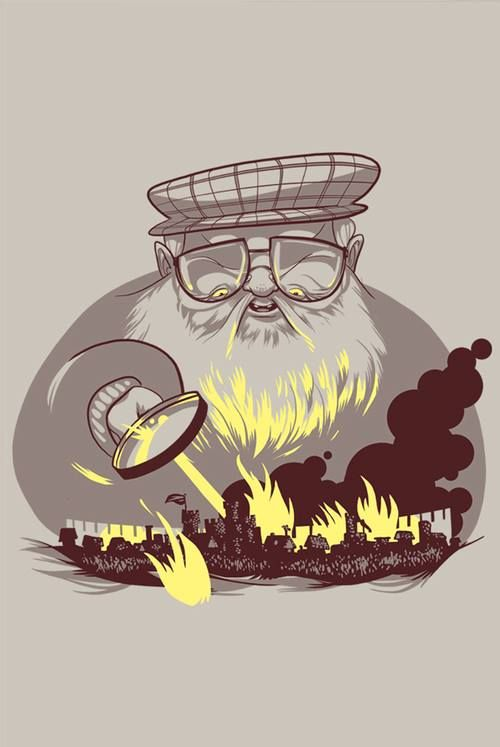

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 49.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 86.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


In [ ]:
# находим медиану и среднее столбца age
mean_Age = np.mean(data['age'].dropna().values)
median_Age = np.quantile(data['age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")

Среднее = 35.29032258064516
Медиана = 24.0


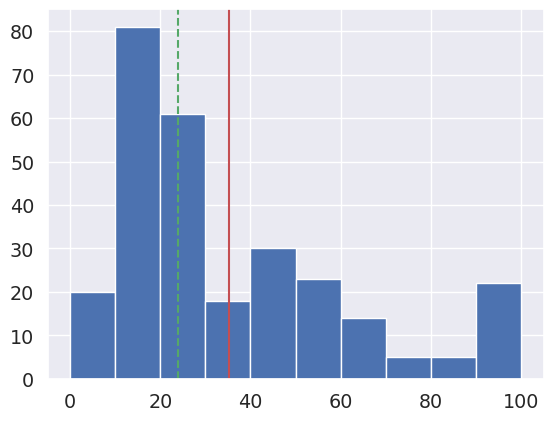

In [ ]:
plt.hist(data['age'])

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

Среднее = 247.55197132616487
Медиана = 272.0


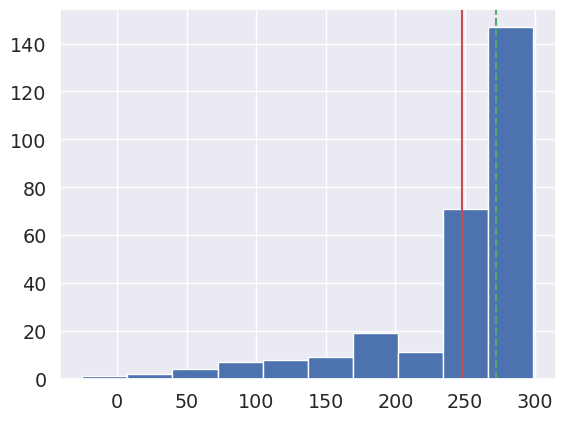

In [ ]:
# находим медиану и среднее столбца dateOfBirth
mean_dateOfBirth = np.mean(data['dateOfBirth'].dropna().values)
median_dateOfBirth = np.quantile(data['dateOfBirth'].dropna().values,q=0.5)
print(f"Среднее = {mean_dateOfBirth}")
print(f"Медиана = {median_dateOfBirth}")

plt.hist(data['dateOfBirth'])

plt.axvline(x=mean_dateOfBirth, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_dateOfBirth, color='g', linestyle = '--', label='median')

plt.show()

In [ ]:
#заменяем null в столбце age на медиану
data.loc[data['age'].isna(), 'age'] = median_Age
#заменяем null в столбце dateOfBirth на среднее
data.loc[data['dateOfBirth'].isna(), 'dateOfBirth'] = mean_dateOfBirth

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
# Установка порога
threshold = 0.5
# Создание нового признака isPopular
data['isPopular'] = (data['popularity'] > threshold).astype(int)
# Создание нового признака boolDeadRelations
data['boolDeadRelations'] = data['numDeadRelations'] > 0
# Преобразование в тип bool
data['boolDeadRelations'] = data['boolDeadRelations'].astype(bool)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari',  'Ghis'],
    'Asshai': ["Asshai'i", 'Asshai'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Andal': ['Andal', 'Andals'],
    'Braavosi': ['Braavosi', 'Braavos'],
    'Dornish': ['Dornishmen', 'Dorne', 'Dornish'],
    'Myrish': ['Myr', 'Myrish', 'Myrmen'],
    'Westermen': ['Westermen', 'Westerman', 'Westerlands'],
    'Westerosi': ['Westeros', 'Westerosi'],
    'Stormlander': ['Stormlands', 'Stormlander'],
    'Norvoshi': ['Norvos', 'Norvoshi'],
    'Northmen': ['The North', 'Northmen', 'Northern mountain clans'],
    'Free Folk': ['Wildling', 'First Men', 'free folk'],
    'Qartheen': ['Qartheen', 'Qarth'],
    'Reach': ['The reach', 'Reach', 'Reachmen'],
    'Lhazareen': ['Lhazareen', 'Lhazarene'],
    'Ironborn': ['ironborn', 'Ironmen'],
    'Valemen': ['Vale', 'Vale mountain clans']
}
# Инвертируем словарь для удобства замены
cult_inverse = {name: key for key, values in cult.items() for name in values}

# Функция для замены культур
def simplify_culture(culture):
    return cult_inverse.get(culture, culture)  # Возвращает оригинальное значение, если не найдено

# Применяем функцию к столбцу culture
data['culture'] = data['culture'].apply(simplify_culture)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'popularity'], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

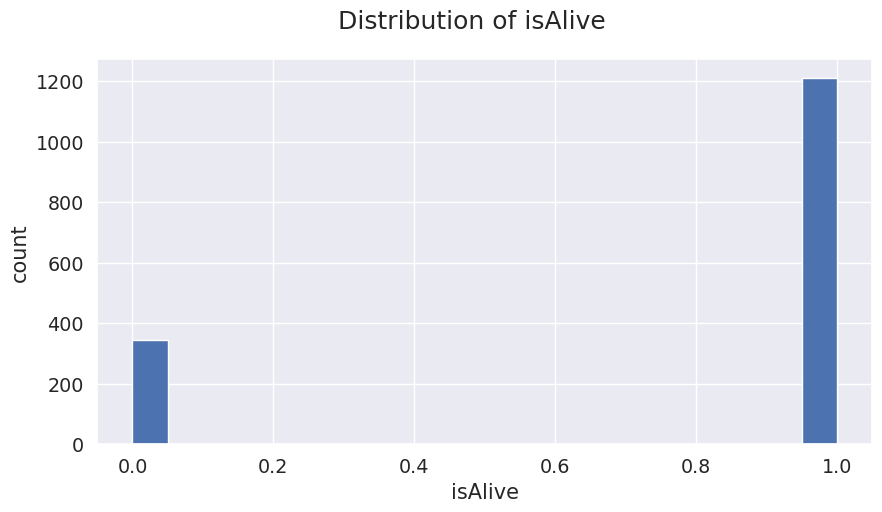

In [ ]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'house', 'book1',
       'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'isAlive', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [ ]:
#выделим категориальные признаки
categorical_columns = ['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'isPopular', 'boolDeadRelations']
categorical_features = data[categorical_columns]
#bиз них нечисловые
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Initialize OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False)
encoder = OrdinalEncoder()

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index
                          )
# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded = pd.concat([data, one_hot_data], axis=1)

# Drop the original categorical columns
df = data_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,1,247.551971,0,0,0,0,0,0,0,24.0,11,0,1,True
2,1,208.000000,1,1,1,1,1,1,1,97.0,1,1,1,True
3,1,247.551971,0,0,0,1,0,0,1,24.0,0,1,0,False
4,0,82.000000,0,0,0,0,0,1,1,23.0,0,0,0,False
5,0,276.000000,0,0,0,1,0,1,1,29.0,0,1,0,False


In [ ]:
#проанализируем количественные признаки
numerical_columns = ['age', 'dateOfBirth']
num_features = data[numerical_columns]

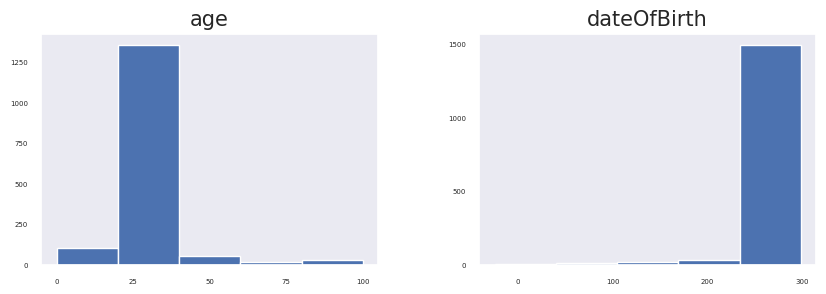

In [ ]:
num_features.hist(figsize=(10, 3), bins=5,xlabelsize=5, ylabelsize=5, grid=False);

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

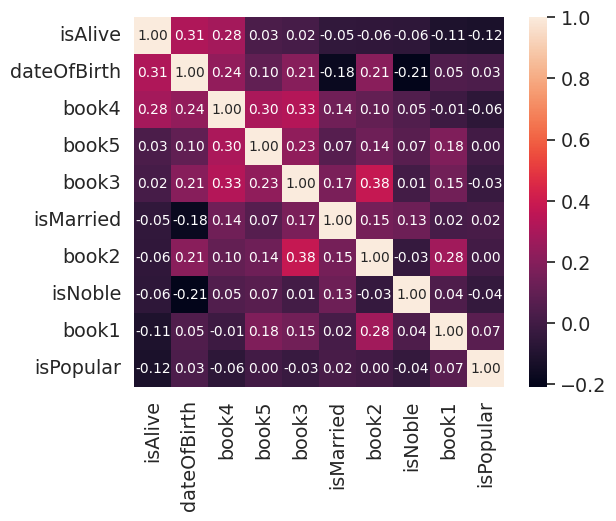

In [ ]:
# correlation matrix
corrmat = df.corr()
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = df.drop(columns=['isAlive']).values
y = df['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(n_jobs=-1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Словарь для хранения моделей
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
}

# Обучение моделей и предсказание на тестовой выборке
for model_name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.2f}')


Logistic Regression Accuracy: 0.84
Random Forest Accuracy: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.85
Gaussian Process Accuracy: 0.86
GaussianNB Accuracy: 0.81
KNeighbors Accuracy: 0.84
Support Vector Classifier Accuracy: 0.82
Decision Tree Accuracy: 0.80


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

Выбираем лучшую модель из предыдущего шага

In [ ]:
# Шаг 1. создание модели
model = AdaBoostClassifier()

# Шаг 2. обучение модели
model.fit(X_train, y_train)

#Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)

print(f'{model_name} Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Decision Tree Accuracy: 0.85


In [ ]:
from sklearn.preprocessing import LabelEncoder


data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')  # Replace with your actual test data file

# находим медиану и среднее столбца age
mean_Age = np.mean(data_test['age'].dropna().values)
median_Age = np.quantile(data_test['age'].dropna().values,q=0.5)
# находим медиану и среднее столбца dateOfBirth
mean_dateOfBirth = np.mean(data_test['dateOfBirth'].dropna().values)
median_dateOfBirth = np.quantile(data_test['dateOfBirth'].dropna().values,q=0.5)
#заменяем null в столбце age на медиану
data_test.loc[data_test['age'].isna(), 'age'] = median_Age
#заменяем null в столбце dateOfBirth на среднее
data_test.loc[data_test['dateOfBirth'].isna(), 'dateOfBirth'] = mean_dateOfBirth

# Установка порога
threshold = 0.5
# Создание нового признака isPopular
data_test['isPopular'] = (data_test['popularity'] > threshold).astype(int)

# Создание нового признака boolDeadRelations
data_test['boolDeadRelations'] = data_test['numDeadRelations'] > 0
# Преобразование в тип bool
data_test['boolDeadRelations'] = data_test['boolDeadRelations'].astype(bool)

# Подсказка
cult = {
    'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari',  'Ghis'],
    'Asshai': ["Asshai'i", 'Asshai'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Andal': ['Andal', 'Andals'],
    'Braavosi': ['Braavosi', 'Braavos'],
    'Dornish': ['Dornishmen', 'Dorne', 'Dornish'],
    'Myrish': ['Myr', 'Myrish', 'Myrmen'],
    'Westermen': ['Westermen', 'Westerman', 'Westerlands'],
    'Westerosi': ['Westeros', 'Westerosi'],
    'Stormlander': ['Stormlands', 'Stormlander'],
    'Norvoshi': ['Norvos', 'Norvoshi'],
    'Northmen': ['The North', 'Northmen', 'Northern mountain clans'],
    'Free Folk': ['Wildling', 'First Men', 'free folk'],
    'Qartheen': ['Qartheen', 'Qarth'],
    'Reach': ['The reach', 'Reach', 'Reachmen'],
    'Lhazareen': ['Lhazareen', 'Lhazarene'],
    'Ironborn': ['ironborn', 'Ironmen'],
    'Valemen': ['Vale', 'Vale mountain clans']
}
# Инвертируем словарь для удобства замены
cult_inverse = {name: key for key, values in cult.items() for name in values}
# Функция для замены культур
def simplify_culture(culture):
    return cult_inverse.get(culture, culture)  # Возвращает оригинальное значение, если не найдено
# Применяем функцию к столбцу culture
data_test['culture'] = data_test['culture'].apply(simplify_culture)

data_test.drop(columns=['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'popularity'], inplace=True)

#выделим категориальные признаки
categorical_columns = ['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'isPopular', 'boolDeadRelations']
categorical_features = data_test[categorical_columns]
#из них нечисловые
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

#Initialize OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False)
encoder = OrdinalEncoder()
# Apply one-hot encoding to the categorical columns
one_hot_encoded_test = encoder.fit_transform(data_test[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_data_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data_test.index                          )
# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded_test = pd.concat([data_test, one_hot_data_test], axis=1)

# Drop the original categorical columns
df_test = data_encoded_test.drop(unprocessed_cat_features, axis=1)

#df_test = df_test.reindex(columns=X_train.columns, fill_value=0)
# Display the resulting dataframe
df_test.info()

# Make predictions
predictions = model.predict(df_test)

# Step 5: Create submission DataFrame and save to CSV
submission = pd.DataFrame({
    'S.No': data_test.index,  # Assuming there's an 'Id' column in your test data
    'isAlive': predictions
})

submission.to_csv('submission.csv', index=False)

print("Файл submission.csv успешно создан!")

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               389 non-null    int64  
 1   dateOfBirth        389 non-null    float64
 2   book1              389 non-null    int64  
 3   book2              389 non-null    int64  
 4   book3              389 non-null    int64  
 5   book4              389 non-null    int64  
 6   book5              389 non-null    int64  
 7   isMarried          389 non-null    int64  
 8   isNoble            389 non-null    int64  
 9   age                389 non-null    float64
 10  numDeadRelations   389 non-null    int64  
 11  isPopular          389 non-null    int64  
 12  boolDeadRelations  389 non-null    bool   
dtypes: bool(1), float64(2), int64(10)
memory usage: 39.9 KB
Файл submission.csv успешно создан!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
